In [1]:
## read features:
import numpy as np
import pandas as pd

base_dir = "C:/Users/Xin/Dropbox/BrainImaging_ML/"
# base_dir = "/home/xin/Dropbox/BrainImaging_ML/"

data_dir = base_dir + "data"
atlas_dir = base_dir + "Atlas_label"
work_dir= base_dir + "multidimensional_age_prediction/"

# # ransac/huber with spm8 vbm features:
# figure_dir = work_dir + "figures_robustreg_behav_hc2"
# result_dir = work_dir + "result_robustreg_behav_hc2"

# # ransac/huber with spm8 vbm features:
# figure_dir = work_dir + "figures_robustreg_behav_hc2_center_age"
# result_dir = work_dir + "result_robustreg_behav_hc2_center_age"

# # ransac/huber with spm8 vbm features:
# figure_dir = work_dir + "figures_robustreg_behav_hc2_stdz_age"
# result_dir = work_dir + "result_robustreg_behav_hc2_stdz_age"

# ransac/huber with spm8 vbm features:
figure_dir = work_dir + "figures01_robustreg_behav_hc2_stdz_age_reverse_fa_allsubjects"
result_dir = work_dir + "out01_robustreg_behav_hc2_stdz_age_reverse_fa_allsubjects"
hc_column = 'mental_hc2'

# figure_dir = work_dir + "figures_robustreg_behav_hc3_stdz_age_reverse_fa"
# result_dir = work_dir + "result_robustreg_behav_hc3_stdz_age_reverse_fa"
# hc_column = 'mental_hc3'

import os
from os import path
#trying to make shift_graphs directory if it does not already exist:

if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)
    
if not os.path.exists(result_dir):
    os.mkdir(result_dir)


# vbm analysis of cat12, 856 subjects. 
#It contains subjects in the ptsd group. So we need to remove them in training stage.
# cat_vbm = pd.read_csv(data_dir+"/ROI_catROI_neuromorphometrics_Vgm.csv", delimiter = ",")
# drop features with all zero values:
# cat_vbm.drop(columns = ['lInfLatVen', 'lOC'], inplace = True)
# print("cat_vbm:")
# print(cat_vbm.shape)
# # print(cat_vbm[:5])
# vbm = cat_vbm

spm_vbm_aal = pd.read_csv(data_dir+"/GMV_AAL_AvgExtract.csv", delimiter = ",")
# rename the subject id:
spm_vbm_aal.iloc[:,0].replace(to_replace=\
                              r'/home/xin/BrainImaging2016/Gender/Result03_Nifti_T1/VBM8/resampled_img/rm0wp1',
                              value='', regex=True, inplace = True)

spm_vbm_aal.iloc[:,0].replace(to_replace=\
                              r'.nii.gz',
                              value='', regex=True, inplace = True)

spm_vbm_aal.rename(columns = {'Unnamed: 0':'names'}, inplace = True) 
spm_vbm_aal['names']=spm_vbm_aal['names'].astype('int64')
# spm_vbm_aal.iloc[:,1:] = spm_vbm_aal.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

# read roi labels for aal atlas:
aal_label = pd.read_csv(atlas_dir+"/AAL_116_Label.csv", delimiter = ',')
spm_vbm_aal.columns = ['names'] + aal_label['ROIname'].to_list()
vbm = spm_vbm_aal


## read label FA features:
label_fa = pd.read_csv(data_dir+"/WMlabelResults_FA_all.csv", index_col=[0])
label_fa = label_fa.drop(['Unnamed: 0.1'], axis = 1)

# remove the last column which is empty.
num_col_fa=len(label_fa.columns) 
label_fa=label_fa.iloc[:,:num_col_fa-1]
label_fa.columns = [str(col) + '(label)' for col in label_fa.columns]

print("label fa:")
print(label_fa.shape)

## read tract FA features:
tract_fa = pd.read_csv(data_dir+"/WMtractResults_FA_all.csv", index_col=0)
tract_fa = tract_fa.drop(['Unnamed: 0.1'], axis = 1)
# remove the last column which is empty.
num_col_fa=len(tract_fa.columns) 
tract_fa=tract_fa.iloc[:,:num_col_fa-1]
tract_fa.columns = [str(col) + '(tract)' for col in tract_fa.columns]

print("tract fa:")
print(tract_fa.shape)
# print(tract_fa[:5])


# multimodal_features = pd.concat([cat_vbm, label_fa, tract_fa, label_md, tract_md, alff, reho], axis = 1,)

# multimodal_features_keys = pd.concat([cat_vbm.drop(['names'], axis=1), label_fa, tract_fa, label_md, tract_md, alff, reho], axis = 1,
#                              keys = ['gmv', 'label_fa', 'tract_fa', 'label_md', 'tract_md', 'alff', 'reho'])

# reverse FA as it has oppsite developmental trend:
multimodal_features = pd.concat([vbm, label_fa*-1, tract_fa*-1], axis = 1,)
subject_id = vbm['names'].to_frame()



label fa:
(856, 50)
tract fa:
(856, 20)


In [2]:
multimodal_features

,names,Left Precentral,Right Precentral,Left Superior Frontal,Right Superior Frontal,Left Superior Frontal Orbital,Right Superior Frontal Orbital,Left Middle Frontal,Right Middle Frontal,Left Middle Frontal Orbital,...,Inferior.fronto-occipital.fasciculus.L(tract),Inferior.fronto-occipital.fasciculus.R(tract),Inferior.longitudinal.fasciculus.L(tract),Inferior.longitudinal.fasciculus.R(tract),Superior.longitudinal.fasciculus.L(tract),Superior.longitudinal.fasciculus.R(tract),Uncinate.fasciculus.L(tract),Uncinate.fasciculus.R(tract),Superior.longitudinal.fasciculus.(temporal.part).L(tract),Superior.longitudinal.fasciculus.(temporal.part).R(tract)
0,600009963128,0.496769,0.492516,0.469744,0.472897,0.555330,0.493855,0.550180,0.543140,0.582114,...,-0.437456,-0.442969,-0.443267,-0.447236,-0.399598,-0.394770,-0.413367,-0.385123,-0.519501,-0.596944
1,600018902293,0.449852,0.416304,0.409503,0.405678,0.480874,0.478561,0.512227,0.462751,0.564870,...,-0.443793,-0.448819,-0.438059,-0.448119,-0.392592,-0.380979,-0.414354,-0.396836,-0.497867,-0.530693
2,600020927179,0.482640,0.467225,0.447501,0.447274,0.517700,0.506424,0.501372,0.497672,0.542297,...,-0.424441,-0.439973,-0.428178,-0.449536,-0.380261,-0.397040,-0.383116,-0.360416,-0.445371,-0.552623
3,600038720566,0.537039,0.500568,0.393680,0.396776,0.462140,0.494675,0.508237,0.509624,0.541629,...,-0.397274,-0.414276,-0.413616,-0.455565,-0.350093,-0.363446,-0.345775,-0.363318,-0.448154,-0.506131
4,600039015048,0.492985,0.456270,0.445612,0.430054,0.530365,0.498957,0.532549,0.497623,0.644824,...,-0.403416,-0.412354,-0.398910,-0.429717,-0.341277,-0.351933,-0.370439,-0.349578,-0.464686,-0.477383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,609952290400,0.509341,0.475429,0.510728,0.475471,0.507305,0.502461,0.562187,0.532146,0.517031,...,-0.417074,-0.421442,-0.418291,-0.434320,-0.362560,-0.364162,-0.383884,-0.384778,-0.430581,-0.446671
852,609987242768,0.457030,0.453794,0.409719,0.428935,0.434518,0.419687,0.507162,0.477671,0.496427,...,-0.428157,-0.432437,-0.419059,-0.426469,-0.358725,-0.364376,-0.391776,-0.358318,-0.449291,-0.454821
853,609987705265,0.546239,0.524109,0.491601,0.512870,0.509529,0.466537,0.618745,0.575515,0.528518,...,-0.448732,-0.442193,-0.430518,-0.454093,-0.400408,-0.407545,-0.402627,-0.384856,-0.471331,-0.539863
854,609989574966,0.533730,0.481235,0.451251,0.410076,0.554846,0.496971,0.570939,0.545644,0.540538,...,-0.415002,-0.420682,-0.410579,-0.437477,-0.360279,-0.367186,-0.380419,-0.354574,-0.474905,-0.544152


In [3]:
cog_label_acc = [
    # executive control:
    "pcet_acc2",
    "pcpt_t_tp",
    "lnb_tp2",
    # episodic memory task:
    "pwmt_kiwrd_tot",
    "pfmt_ifac_tot",
    "volt_svt",
    # complex cognitive task:
    "pvrt_cr",
    "pmat_cr",
    "plot_tc",
    # social cognition task:
    "peit_cr",
    "pedt_a",
    "padt_a"
]

cog_label_speed = [
    # executive control:
    "pcet_rtcr",
    "pcpt_t_tprt",
    "lnb_rtc2",
    # episodic memory task:
    "pwmt_kiwrd_rtc",
    "pfmt_ifac_rtc",
    "volt_svtcrt",
    # complex cognitive task:
    "pvrt_rtcr",
    "pmat_rtcr",
    "plot_tcrt",
    # social cognition task:
    "peit_crt",
    "pedt_t",
    "padt_t",
    # sensorimotor speed task:
    "mp_mp2rtcr",
    "tap_tot"
]

cog_label_acc2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI"
]
cog_label_acc2 = [s + '_Accuracy' for s in cog_label_acc2]

cog_label_speed2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI",
    # sensorimotor speed task:
    "MOT",
    "SM"
]
cog_label_speed2 = [s + '_Speed' for s in cog_label_speed2]

cog_score_label = cog_label_acc + cog_label_speed
cog_score_label2 = cog_label_acc2 + cog_label_speed2
num_cog = len(cog_score_label)


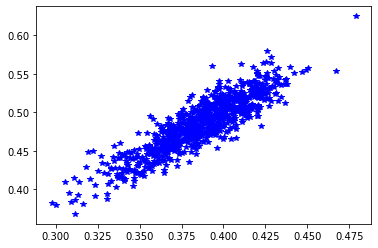

In [4]:
import matplotlib.pyplot as plt

plt.plot(label_fa.iloc[:,35], tract_fa.iloc[:,4], 'b*')

In [5]:
# read subject_info:
# pnc_subject_info = pd.read_csv(data_dir+"/pnc_subject_info.csv", delimiter = ",")
# pnc_subject_info = pnc_subject_info[['SUBJID', 'Sex', 'age_at_cnb']]

# select mental healthy subjects:
behav_data = pd.read_csv(data_dir+"/pyresult01_pnc_behav_mental4.csv", delimiter = ",")
behav_data = behav_data.astype({'SUBJID': 'int64'})
behav_data["Med_Rating"] = behav_data["Med_Rating"].apply(pd.to_numeric, errors='coerce')
behav_data = behav_data.loc[behav_data["Med_Rating"]<2,:]


# save data for all subjects (including disorder groups) for later analysis:
behav_data_all = behav_data.loc[:, ['SUBJID', 'Sex', 'age_at_cnb']+cog_score_label]
behav_data_all.columns = ['SUBJID', 'Sex', 'age_at_cnb']+cog_score_label2



behav_feature = behav_data_all.merge(multimodal_features, how = "inner", 
                                            right_on = "names", left_on = "SUBJID")


print(behav_feature['age_at_cnb'].max())
print(behav_feature['age_at_cnb'].min())
print(behav_feature['age_at_cnb'].mean())
print(behav_feature['age_at_cnb'].std())
print(behav_feature.loc[behav_feature['Sex']=='F',:].shape)

21.0
8.0
14.204918032786885
3.2838824307844106
(335, 216)


In [6]:


def behav_feature_preprocessing( behav_feature ):
    # reverse speed scores:
    behav_feature.loc[:,cog_label_speed2] = behav_feature.loc[:,cog_label_speed2]*-1

    #subject_info_feature['Sex'] = subject_info_feature['Sex'].apply({'F':0, 'M':1}.get)
    # code females as -1 for easy interpretation of beta for age and age2
    behav_feature['Sex'] = behav_feature['Sex'].apply({'F':-1, 'M':1}.get)

    # check merge
    print(behav_feature.loc[:,['SUBJID', 'names']])
    behav_feature.drop(['names'], axis=1, inplace = True)
    # subject_info_feature.drop(['SUBJID'], axis=1, inplace = True)

    #normalize the brain imaging feature columns:
    behav_feature.iloc[:,3:] = (behav_feature.iloc[:,3:] - behav_feature.iloc[:,3:].min()) / \
                            (behav_feature.iloc[:,3:].max() - behav_feature.iloc[:,3:].min())
    
    return(behav_feature)


behav_feature = behav_feature_preprocessing(behav_feature)
behav_feature_all = behav_feature_preprocessing(behav_feature_all)





           SUBJID         names
0    600009963128  600009963128
1    600018902293  600018902293
2    600038720566  600038720566
3    600039015048  600039015048
4    600039665619  600039665619
..            ...           ...
605  609903870257  609903870257
606  609910470154  609910470154
607  609919910881  609919910881
608  609987705265  609987705265
609  609998081561  609998081561

[610 rows x 2 columns]
           SUBJID         names
0    600009963128  600009963128
1    600018902293  600018902293
2    600038720566  600038720566
3    600039015048  600039015048
4    600039665619  600039665619
..            ...           ...
605  609903870257  609903870257
606  609910470154  609910470154
607  609919910881  609919910881
608  609987705265  609987705265
609  609998081561  609998081561

[610 rows x 2 columns]


In [7]:
behav_feature.to_csv(result_dir+'/out01_behav_feature_all.csv')

num_subjects = behav_feature.shape[0]
# count number of NaNs:
# row_nancount = subject_info_feature.isna().sum()
# subject_info_feature = subject_info_feature.loc[:, subject_info_feature.isna().sum()==0]



# # center age at sample mean:
# behav_feature['age_at_cnb']=behav_feature['age_at_cnb']-behav_feature['age_at_cnb'].mean()

# standardize age at sample mean:
behav_feature['age_at_cnb']= (behav_feature['age_at_cnb']-behav_feature['age_at_cnb'].mean())/behav_feature['age_at_cnb'].std()

behav_feature

,SUBJID,Sex,age_at_cnb,ABF_Accuracy,ATT_Accuracy,WM_Accuracy,VMEM_Accuracy,FMEM_Accuracy,SMEM_Accuracy,LAN_Accuracy,...,Inferior.fronto-occipital.fasciculus.L(tract),Inferior.fronto-occipital.fasciculus.R(tract),Inferior.longitudinal.fasciculus.L(tract),Inferior.longitudinal.fasciculus.R(tract),Superior.longitudinal.fasciculus.L(tract),Superior.longitudinal.fasciculus.R(tract),Uncinate.fasciculus.L(tract),Uncinate.fasciculus.R(tract),Superior.longitudinal.fasciculus.(temporal.part).L(tract),Superior.longitudinal.fasciculus.(temporal.part).R(tract)
0,600009963128,-1,-1.584989,0.827174,0.759259,0.6,0.947368,0.714286,0.3,0.928571,...,0.326567,0.250358,0.210130,0.382768,0.173371,0.327460,0.285558,0.294977,0.210360,0.172512
1,600018902293,-1,0.242116,0.653699,0.981481,0.9,1.000000,0.761905,0.5,1.000000,...,0.275214,0.200733,0.248365,0.376475,0.240746,0.448465,0.278983,0.220017,0.319272,0.481875
2,600038720566,-1,-0.975954,0.128938,0.925926,0.8,0.947368,0.761905,0.9,0.642857,...,0.652186,0.493761,0.427814,0.323408,0.649449,0.602302,0.735832,0.434524,0.569544,0.596569
3,600039015048,1,-0.975954,0.927979,0.888889,0.8,1.000000,0.523810,0.8,0.714286,...,0.602413,0.510065,0.535779,0.507626,0.734231,0.703319,0.571529,0.522457,0.486317,0.730809
4,600039665619,1,-1.584989,0.109595,0.407407,0.9,0.473684,0.238095,0.5,0.571429,...,0.547260,0.418389,0.468362,0.430861,0.698168,0.663090,0.498471,0.505453,0.648347,0.672080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,609903870257,1,-0.062401,0.606097,0.888889,1.0,1.000000,0.190476,0.2,0.714286,...,0.247954,0.236370,0.286761,0.344140,0.326249,0.351870,0.420950,0.331699,0.323889,0.287042
606,609910470154,-1,1.460187,0.790127,0.814815,0.9,0.842105,0.761905,0.6,0.857143,...,0.500956,0.503805,0.344774,0.384208,0.588748,0.537540,0.559638,0.588349,0.504355,0.619436
607,609919910881,1,0.242116,0.715320,0.944444,0.8,0.894737,0.571429,0.8,0.857143,...,0.405812,0.368628,0.392230,0.418033,0.380766,0.362820,0.375804,0.218315,0.603063,0.432999
608,609987705265,1,0.242116,0.745868,0.814815,1.0,0.842105,0.523810,0.9,1.000000,...,0.235191,0.256941,0.303727,0.333899,0.165582,0.215371,0.357104,0.296686,0.452864,0.439055


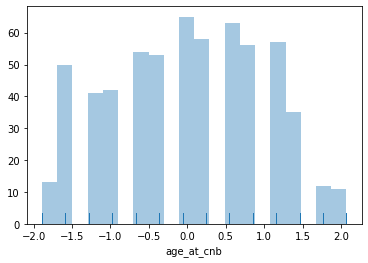

In [8]:
import seaborn as sns

sns.distplot(behav_feature['age_at_cnb'], kde=False, rug=True, bins = 20)

In [9]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def qudratic_r_squared_gender(Matrix):
    """
    compute the r squared of curve fit of chro_age vs. brain age.
    1. Use qudratic function to fit brain age with chronological age and gender.
    2. Then, compute r squared of brain age and predicted brain age with qudratic fit model.
    
    use the first 2 columns to fit the 3rd column of Matrix
    """
    
    # remove NaN values:
    nan_idx = np.isnan(Matrix).any(axis = 1)
    Matrix = Matrix[~nan_idx,:]
    
    chro_age = Matrix[:,1]
    gender = Matrix[:,0]
    brain_age = Matrix[:,2]
    
    print(Matrix.shape)
    if Matrix.shape[0]<20:
        output = np.empty((6))
        output[:] = np.nan
        return(output)
    else:
    
        def qudratic_fun(x, a, b, c, d, e, f):
            x1, x2 = x
            #return a + b*x1 + c*(x1**2) + d*x2 + e*x1*x2 f*(x1**2)*x2
            return a + b*x1 + c*(x1**2) + d*x2 + e*x1*x2 + f*(x1**2)*x2

        popt, pcov = curve_fit(qudratic_fun, (chro_age, gender), brain_age)
        brain_age_pred = qudratic_fun((chro_age, gender), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])

        r_square = r2_score(brain_age, brain_age_pred)

        return(np.array([popt[1], popt[2], popt[3], popt[4], popt[5], r_square]))
    

# def sigmoid(x, c, k, x0, y0):
#     return c / (1 + np.exp(-k*(x-x0))) + y0    

def sigmoid(x, k, x0):
    return 1 / (1 + np.exp(-k*(x-x0)))  

def sigmoid2(x, c, k, x0, y0):
    return c*x/((x-x0)**2+k)+y0

def sigmoid_fit(age, gender, feature):
    """
    compute the sigmoid curve fit of chro_age vs. brain feature.
    1. Use sigmoid function to fit feature with chronological age.
    2. Then, compute r squared of brain age and predicted brain age.
    
    use the first 2 columns to fit the 3rd column of Matrix
    """
    
    Matrix = np.transpose(np.vstack((age, feature, gender)))
    #print(Matrix)
    # remove NaN values:
    nan_idx = np.isnan(Matrix).any(axis = 1)
    Matrix = Matrix[~nan_idx,:]
    
    idx_male = Matrix[:,2]==1
    idx_female = Matrix[:,2]!=1
    #print(Matrix[idx_male,:])
    
    print(Matrix.shape)
    if Matrix.shape[0]<20:
        print('length of input matrix is less than 20, return nan values...')
        output = np.empty((6))
        output[:] = np.nan
        return(output)
    else:
    
#         popt, pcov = curve_fit(sigmoid, chro_age, feature, 
#                                maxfev=5000, method='dogbox', bounds=([0, -1, -1, 0],[1, 1, 1, 1]))
        
        popt, pcov = curve_fit(sigmoid2, Matrix[idx_male,0], Matrix[idx_male,1], \
                               maxfev=5000, method='dogbox', bounds=([-50, 10, 10, -1],[50, 300, 100, 1.5]))
        
        popt2, pcov2 = curve_fit(sigmoid2, Matrix[idx_female,0], Matrix[idx_female,1], \
                               maxfev=5000, method='dogbox', bounds=([-50, 10, 10, -1],[50, 300, 100, 1.5]))
        
        feature_pred = Matrix[:,0]*np.nan
        feature_pred[idx_male] = sigmoid2(Matrix[idx_male,0], popt[0], popt[1], popt[2], popt[3])
        feature_pred[idx_female] = sigmoid2(Matrix[idx_female,0], popt2[0], popt2[1], popt2[2], popt2[3])

        r_square = r2_score(chro_age, feature_pred)

        return(np.array([popt[0], popt[1], popt[2], popt[3],\
                         popt2[0], popt2[1], popt2[2], popt2[3],\
                         r_square]))
        
   


In [10]:
# test sigmoid curve:

# x = np.linspace(0, 30, num=30)
# y_fitted = sigmoid(x, feature_beta_df.iloc[i_feature,1],feature_beta_df.iloc[i_feature,2],
#                    feature_beta_df.iloc[i_feature,3],feature_beta_df.iloc[i_feature,4])


In [11]:
# from sklearn.covariance import MinCovDet
# from sklearn.ensemble import IsolationForest

# def find_outlier(X, thresh_std = 2.5):
    
#     # fit a Minimum Covariance Determinant (MCD) robust estimator to data
#     robust_cov = MinCovDet().fit(X)
#     robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
    
#     m_mahal = np.mean(robust_mahal)
#     sd_mahal = np.std(robust_mahal)
#     thresh_high = m_mahal+sd_mahal
#     thresh_low = m_mahal-sd_mahal
    
#     remove_idx = np.logical_or(robust_mahal>thresh_high, robust_mahal<thresh_low)
    
#     return(remove_idx)

# rng = np.random.RandomState(42)

# def find_outlier(X):
#     clf = IsolationForest(behaviour = 'new', max_samples=100, random_state=rng, contamination=.01)
#     clf.fit(X)
#     y_pred_outliers = clf.predict(X)
#     y_pred_outliers = y_pred_outliers==-1
    
#     return(y_pred_outliers)

def find_outlier(x, thresh_std = 10):
    mean = np.mean(x)
    std = np.std(x)
    
    outlier = np.logical_or(x>(mean+thresh_std*std), x<(mean-thresh_std*std))
    return(outlier)
    

In [12]:
features_keys = pd.concat([behav_data_hc.iloc[:, 3:], vbm.drop(['names'], axis=1), label_fa, tract_fa], axis = 1,
                             keys = ['behav', 'gmv', 'label_fa', 'tract_fa'])

features_keys = features_keys.columns.get_level_values(0)
features_keys

feature_beta_df = pd.DataFrame(index = behav_feature.columns[3:], 
                               columns = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender', 'Rsquare', 'RsquareMedian'])

feature_beta_df.insert(0, 'modality', features_keys)
feature_p_df = pd.DataFrame(index = behav_feature.columns[3:], 
                            columns = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender'])
feature_p_df.insert(0, 'modality', features_keys)


Rsquare_col = feature_beta_df.shape[1]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats

import statistics

# scaler = MinMaxScaler()
scaler = RobustScaler()

# scaler.fit(subject_info_feature.iloc[:,3:].values)
# subject_info_feature.iloc[:,3:] = scaler.transform(subject_info_feature.iloc[:,3:].values)

# alpha = np.power(10, np.linspace(-1, 3, num = 50))
# ridge_cv = RidgeCV(alphas=alpha, cv = 5)

lr = LinearRegression()

# as robust scaler scales the data by IQR, we set the residualthreshold to 1.5
robust_reg = RANSACRegressor(base_estimator = lr, min_samples=.95, residual_threshold = 1.5,
                             stop_probability=.99, stop_n_inliers = num_subjects*.99)

# robust_reg = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001, warm_start=False, fit_intercept=True, tol=1e-05)

num_features = len(behav_feature.columns)-3

scaler.fit(behav_feature.iloc[:,3:].values)
behav_feature.iloc[:,3:] = scaler.transform(behav_feature.iloc[:,3:].values)

for i_feature in range(num_features):
    print(i_feature)
    print(feature_beta_df.index[i_feature])
    
    gender = behav_feature.iloc[:,1].values
    chro_age = behav_feature.iloc[:,2].values
    
    feature = behav_feature.iloc[:,3+i_feature].values
    nan_idx = np.isnan(feature)
    
#     # remove outliers:
#     X = np.transpose(np.vstack((chro_age, feature, gender)))
#     remove_idx = find_outlier(X)
    gender = gender[~nan_idx]
    chro_age = chro_age[~nan_idx]
    
    X = np.transpose(np.vstack((chro_age, chro_age**2, gender, chro_age*gender, (chro_age**2)*gender)))
    y = feature[~nan_idx]
    
############################################## ridge CV:########################################

#     # remove outliers based on the residuals of ridge regression:
#     clf = ridge_cv.fit(X, y)
#     residuals = y-clf.predict(X)
#     remove_idx = find_outlier(residuals)
    
#     # scale y with outlier removed:
#     scaler.fit(y[~remove_idx].reshape(-1,1))
#     y = scaler.transform(y.reshape(-1,1))
    
#     clf = ridge_cv.fit(X[~remove_idx,:], y[~remove_idx].flatten())
#     r2 = clf.score(X[~remove_idx,:], y[~remove_idx]) 
#     feature_beta_df.iloc[i_feature,1:] = np.hstack((clf.coef_, r2))

############################################ robust regression: #################################

    # scale the feature with inliers:
#     robust_reg.fit(X, y)
#     inlier_mask = np.logical_not(robust_reg.outliers_)
#     inlier_mask = robust_reg.inlier_mask_
#     scaler.fit(y[inlier_mask].reshape(-1,1))
#     y = scaler.transform(y.reshape(-1,1)).flatten()

    lr_all = lr.fit(X, y)
    # robust regression:
    robust_reg.fit(X, y)
    
#     inlier_mask = np.logical_not(robust_reg.outliers_)
    inlier_mask = robust_reg.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    coefs = robust_reg.estimator_.coef_
    
    # fit linear regression inliers and get the p-values of coefficients:
    lr.fit(X[inlier_mask,:], y[inlier_mask])
    params = np.append(lr.intercept_,lr.coef_)
    #predictions = lr.predict(X[inlier_mask,:])
    predictions = lr.predict(X)
    
    # calculate p values:
#     newX = np.append(np.ones((len(X[inlier_mask,:]),1)), X[inlier_mask,:], axis=1)
#     MSE = (sum((y[inlier_mask]-predictions)**2))/(len(newX)-len(newX[0]))
    
    newX = np.append(np.ones((len(X),1)), X, axis=1)
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))


    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b
    p_values =np.array([2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b])
    
    # compare the coefs of lr (with inliers) and ransac, which should be same
    print(coefs)
    print(lr.coef_)
    
    # set non-significant coefs to 0:
    # coefs[p_values[1:]>0.05]=0 
    # np.place(coefs, p_values[1:]>.05, 0)
    
    r2 = robust_reg.score(X, y) 
    r2_median = 1- (statistics.median(abs(predictions-y))/statistics.median(abs(y-statistics.mean(y))))**2
    feature_p_df.iloc[i_feature,1:] = p_values[1:]
    feature_beta_df.iloc[i_feature,1:] = np.hstack((coefs, r2, r2_median))
#     feature_beta_df.iloc[i_feature,1:] = np.hstack((robust_reg.coef_, r2))
    
############################################# make regression plots:#############################
    #plot_age = np.arange(5,26, step = 1)
    plot_age = np.arange(min(X[:,0])-1, max(X[:,0])+1, step = 1)
    plot_gender = np.ones(len(plot_age))
    
    plot_x_male = np.transpose(np.vstack((plot_age, plot_age**2, plot_gender, 
                                          plot_age*plot_gender, (plot_age**2)*plot_gender)))
    
    plot_x_female = np.transpose(np.vstack((plot_age, plot_age**2, -plot_gender,
                                            plot_age*-plot_gender, (plot_age**2)*-plot_gender)))
    
    y_curve_male = lr_all.predict(plot_x_male)
    y_curve_female = lr_all.predict(plot_x_female)
    
    y_curve_male = lr_all.predict(plot_x_male)
    y_curve_female = lr_all.predict(plot_x_female)
    
    y_curve_male_ransac = robust_reg.predict(plot_x_male)
    y_curve_female_ransac = robust_reg.predict(plot_x_female)
    
    y_curve_male_ransac = robust_reg.predict(plot_x_male)
    y_curve_female_ransac = robust_reg.predict(plot_x_female)
    
    label = "$R^2$ = %.3f" % r2

    fig = plt.figure()
    ax = fig.add_subplot(111)    
    
    ax.plot(plot_age, y_curve_female, 'r--')
    ax.plot(plot_age, y_curve_male, 'b--')
    
    ax.plot(plot_age, y_curve_female_ransac, 'r-')
    ax.plot(plot_age, y_curve_male_ransac, 'b-')
    
    idx = np.logical_and(gender==-1, outlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'r+', markersize = 2.5)
    
    idx = np.logical_and(gender==-1, inlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'ro', label='females', markersize = 2.5)
    
    idx = np.logical_and(gender==1, outlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'b+', markersize = 2.5)
    
    idx = np.logical_and(gender==1, inlier_mask)
    ax.plot(chro_age[idx]+np.random.random(sum(idx))*.3, y[idx], 
            'bo', label='males', markersize = 2.5)
    
    ax.text(min(X[:,0]+1), max(y), label, fontsize = 10)
    y_label = feature_beta_df.index[i_feature]+' ('+ feature_beta_df.iloc[i_feature, 0]+')'    
    if len(y_label)>20:
        y_label = y_label[:20]

    ax.set_ylabel(y_label)

    ax.legend()
    fig.savefig(figure_dir+'/figure_scatter_age_feature_' +
               feature_beta_df.iloc[i_feature, 0] + str(i_feature) + '.jpg', format = 'jpg', dpi=300)
    plt.close('all')

        
############################################## sigmoid fit:########################################
#     try:
#         feature_beta_df.iloc[i_feature,1:] = sigmoid_fit(chro_age, gender, feature)

#         x = np.linspace(6, 23, num=30)
#         y_fit_m = sigmoid2(x, feature_beta_df.iloc[i_feature,1],feature_beta_df.iloc[i_feature,2],
#                            feature_beta_df.iloc[i_feature,3],feature_beta_df.iloc[i_feature,4])

#         y_fit_f = sigmoid2(x, feature_beta_df.iloc[i_feature,5],feature_beta_df.iloc[i_feature,6],
#                            feature_beta_df.iloc[i_feature,7],feature_beta_df.iloc[i_feature,8])

#         fig = plt.figure()
#         ax = fig.add_subplot(111)    
#         ax.plot(x, y_fit_m, 'b--', label='male')
#         ax.plot(x, y_fit_f, 'r--', label='female')

#         male_idx = subject_info_feature.iloc[:,1]==1
#         female_idx = subject_info_feature.iloc[:,1]!=1

#         ax.plot(subject_info_feature.loc[male_idx].iloc[:,2],
#                 subject_info_feature.loc[male_idx].iloc[:,i_feature+3], 'bo')

#         ax.plot(subject_info_feature.loc[female_idx].iloc[:,2],
#                 subject_info_feature.loc[female_idx].iloc[:,i_feature+3],'ro')

#         ax.legend()
#         fig.savefig(figure_dir+'/figure_scatter_age_feature_sigmoid2fit_' +
#                    feature_beta_df.iloc[i_feature, 0] + str(i_feature) + '.jpg', format = 'jpg', dpi=300)
#         plt.close('all')

#         print(feature_beta_df.iloc[i_feature,1:])
#     except:
#         fig = plt.figure()
#         ax = fig.add_subplot(111)    

#         male_idx = subject_info_feature.iloc[:,1]==1
#         female_idx = subject_info_feature.iloc[:,1]!=1

#         ax.plot(subject_info_feature.loc[male_idx].iloc[:,2],
#                 subject_info_feature.loc[male_idx].iloc[:,i_feature+3], 'bo')

#         ax.plot(subject_info_feature.loc[female_idx].iloc[:,2],
#                 subject_info_feature.loc[female_idx].iloc[:,i_feature+3],'ro')

#         ax.legend()
#         fig.savefig(figure_dir+'/figure_scatter_age_feature_sigmoid2fit_fail_' +
#                    feature_beta_df.iloc[i_feature, 0] + str(i_feature) + '.jpg', format = 'jpg', dpi=300)
#         plt.close('all')
    
    

0
ABF_Accuracy
[ 0.08409282 -0.02552173  0.10129002  0.01567725 -0.0246345 ]
[ 0.08409282 -0.02552173  0.10129002  0.01567725 -0.0246345 ]
1
ATT_Accuracy
[ 0.28580148 -0.05615435  0.02828134  0.01130392 -0.01967548]
[ 0.28580148 -0.05615435  0.02828134  0.01130392 -0.01967548]
2
WM_Accuracy
[ 0.17564418 -0.07681342  0.06651393 -0.03059487 -0.00508701]
[ 0.17564418 -0.07681342  0.06651393 -0.03059487 -0.00508701]
3
VMEM_Accuracy
[ 0.10682989 -0.03722491  0.05777932  0.0154436  -0.07519658]
[ 0.10682989 -0.03722491  0.05777932  0.0154436  -0.07519658]
4
FMEM_Accuracy
[ 0.17045203 -0.06821428  0.06646984 -0.02251658 -0.05574827]
[ 0.17045203 -0.06821428  0.06646984 -0.02251658 -0.05574827]
5
SMEM_Accuracy
[ 0.04667538 -0.02074038  0.05558192 -0.02160247 -0.00991188]
[ 0.04667538 -0.02074038  0.05558192 -0.02160247 -0.00991188]
6
LAN_Accuracy
[ 0.29314261 -0.08483828  0.1120429  -0.01480864 -0.00943051]
[ 0.29314261 -0.08483828  0.1120429  -0.01480864 -0.00943051]
7
NVR_Accuracy
[ 0.239173

57
Right Anterior Cingulum
[-0.33948665  0.0650934   0.01940144 -0.00592135 -0.00181412]
[-0.33948665  0.0650934   0.01940144 -0.00592135 -0.00181412]
58
Left Middle Cingulum
[-0.36662655  0.08281276  0.10588865  0.03000484 -0.0131827 ]
[-0.36662655  0.08281276  0.10588865  0.03000484 -0.0131827 ]
59
Right Middle Cingulum
[-0.37515841  0.04307667  0.09917837 -0.00262521 -0.00634366]
[-0.37515841  0.04307667  0.09917837 -0.00262521 -0.00634366]
60
Left Cingulum
[-0.27980947  0.12188713  0.23433931 -0.02421978  0.00810244]
[-0.27980947  0.12188713  0.23433931 -0.02421978  0.00810244]
61
Right Cingulum
[-0.24705286  0.12587405  0.18888499 -0.05055561  0.0282729 ]
[-0.24705286  0.12587405  0.18888499 -0.05055561  0.0282729 ]
62
Left Hippocampus
[-0.22649144  0.10140118  0.0113846  -0.08349529 -0.04071371]
[-0.22649144  0.10140118  0.0113846  -0.08349529 -0.04071371]
63
Right Hippocampus
[-0.1717169   0.03865671 -0.07211993 -0.06363941 -0.03951889]
[-0.1717169   0.03865671 -0.07211993 -0.06

114
Left Inferior Temporal
[-0.32939396  0.07584938  0.09399333 -0.01344871  0.0098122 ]
[-0.32939396  0.07584938  0.09399333 -0.01344871  0.0098122 ]
115
Right Inferior Temporal
[-0.39461642  0.11034276  0.0971425   0.00553359  0.00121169]
[-0.39461642  0.11034276  0.0971425   0.00553359  0.00121169]
116
Cerebellum_Crus1_L
[-0.29634324  0.03424895 -0.02664214 -0.0942968  -0.02802419]
[-0.29634324  0.03424895 -0.02664214 -0.0942968  -0.02802419]
117
Cerebellum_Crus1_R
[-0.29842253  0.04873006 -0.03174969 -0.09568303 -0.01180175]
[-0.29842253  0.04873006 -0.03174969 -0.09568303 -0.01180175]
118
Cerebellum_Crus2_L
[-0.25981511 -0.02048718 -0.14455762 -0.07144122 -0.00516091]
[-0.25981511 -0.02048718 -0.14455762 -0.07144122 -0.00516091]
119
Cerebellum_Crus2_R
[-0.33691205  0.02829463 -0.10010004 -0.10414587 -0.02773311]
[-0.33691205  0.02829463 -0.10010004 -0.10414587 -0.02773311]
120
Cerebellum_3_L
[ 0.01009261 -0.00370003  0.2089374   0.07329943 -0.0741503 ]
[ 0.01009261 -0.00370003  0.

168
 Posterior.corona.radiata.R(label)
[-0.23769158  0.09473531 -0.01526102 -0.04625544 -0.01302134]
[-0.23769158  0.09473531 -0.01526102 -0.04625544 -0.01302134]
169
 Posterior.corona.radiata.L(label)
[-0.22594855  0.07447797  0.03726334 -0.03016343 -0.00925514]
[-0.22594855  0.07447797  0.03726334 -0.03016343 -0.00925514]
170
 Posterior.thalamic.radiation.(include.optic.radiation).R(label)
[-0.16458923  0.05947212 -0.00299    -0.06914226 -0.0460691 ]
[-0.16458923  0.05947212 -0.00299    -0.06914226 -0.0460691 ]
171
 Posterior.thalamic.radiation.(include.optic.radiation).L(label)
[-0.10389338  0.07954053  0.09253818 -0.01519538 -0.06616138]
[-0.10389338  0.07954053  0.09253818 -0.01519538 -0.06616138]
172
 Sagittal.stratum.(include.inferior.longitidinal.fasciculus.and.inferior.fronto-occipital.fasciculus).R(label)
[-0.14586312  0.11377073  0.10356946 -0.0215552  -0.04709564]
[-0.14586312  0.11377073  0.10356946 -0.0215552  -0.04709564]
173
 Sagittal.stratum.(include.inferior.longitidi

In [14]:
# feature_beta_df.to_csv(result_dir+'/feature_beta_sigmoid2.csv')
feature_beta_df.to_csv(result_dir+'/out01_behav_feature_beta_ransac_lr.csv')
feature_p_df.to_csv(result_dir+'/out01_behav_feature_p_ransac_lr.csv')
# feature_beta_df.to_csv(result_dir+'/feature_beta_huber.csv')

In [15]:
# clf.alpha_

In [16]:
# x=np.array([[1,2,3],[np.nan, 2,4]])
# np.isnan(x).any(axis=1)
feature_beta_df.iloc[22,1:].isnull().any()

False

In [17]:
feature_beta_df.loc[:, 'Rsquare'].min()

-0.024485000513928993

In [18]:
feature_beta_df_fa = feature_beta_df.loc[(feature_beta_df["modality"]=='tract_fa')|(feature_beta_df["modality"]=='label_fa'),:]
feature_beta_df_fa.sort_values(by = 'Rsquare', ascending = False)

,modality,age,age$^2$,gender,age*gender,age$^2$*gender,Rsquare,RsquareMedian
Cingulum.(cingulate.gyrus).R(label),label_fa,-0.40173,0.114856,0.00730383,-0.0262464,-0.0382495,0.32891,0.388568
Cingulum.(cingulate.gyrus).L(tract),tract_fa,-0.376641,0.117272,-0.0737835,-0.0262706,-0.0139521,0.320362,0.385985
Cingulum.(cingulate.gyrus).L(label),label_fa,-0.386449,0.123901,-0.0339138,-0.0541828,-0.0245603,0.319256,0.34285
Cingulum.(cingulate.gyrus).R(tract),tract_fa,-0.370031,0.115812,-0.0253131,-0.00541332,-0.0345966,0.308026,0.293563
Anterior.limb.of.internal.capsule.R(label),label_fa,-0.347044,0.120905,-0.054296,-0.0454559,-0.0355321,0.259923,0.224918
...,...,...,...,...,...,...,...,...
Retrolenticular.part.of.internal.capsule.R(label),label_fa,-0.0802365,0.0507112,0.034353,-0.0274652,-0.0237435,0.0212558,-0.00721131
Fornix.(cres)./.Stria.terminalis.(can.not.be.resolved.with.current.resolution).R(label),label_fa,-0.0885255,0.0103224,0.0977324,-0.0121464,-0.0849699,0.020662,0.083208
Superior.longitudinal.fasciculus.(temporal.part).R(tract),tract_fa,-0.108599,0.0246404,-0.0201978,-0.0499205,0.00759091,0.0206114,0.0678591
Pontine.crossing.tract.(a.part.of.MCP)(label),label_fa,0.0528587,-0.0359972,0.0479231,0.0610154,-0.0493353,0.0116633,0.0274435


In [19]:
feature_beta_df_gmv = feature_beta_df.loc[feature_beta_df["modality"]=='gmv',:]
feature_beta_df_gmv.sort_values(by = 'Rsquare', ascending = False)

,modality,age,age$^2$,gender,age*gender,age$^2$*gender,Rsquare,RsquareMedian
Right Superior Temporal,gmv,-0.473769,0.151403,0.0534756,-0.0440703,0.000575638,0.474795,0.551028
Left Middle Frontal Orbital,gmv,-0.464304,0.151378,0.0255218,-0.0136754,-0.00401155,0.456704,0.510206
Left Middle Frontal,gmv,-0.4444,0.0955993,0.129312,-0.00339975,-0.0255812,0.453515,0.578382
Right Middle Frontal,gmv,-0.476645,0.123549,0.0631573,0.00646805,-0.0279559,0.431542,0.459095
Left Inferior Frontal,gmv,-0.465435,0.0986648,0.0413127,-0.00987015,-0.0293601,0.428765,0.475826
...,...,...,...,...,...,...,...,...
Cerebellum_9_R,gmv,-0.0518607,-0.00193073,-0.0925636,0.0522581,-0.0231331,0.0234079,0.0688692
Vermis_9,gmv,-0.0526971,-0.00233024,-0.100638,0.0625987,0.00772833,0.0182978,-0.0602815
Cerebellum_10_L,gmv,0.0235894,-0.0256709,0.0354954,0.0246376,-0.0723913,0.00944911,0.0108784
Vermis_10,gmv,-0.00791733,-0.00714322,-0.0797851,0.0464537,0.0175264,0.00888623,0.0596731


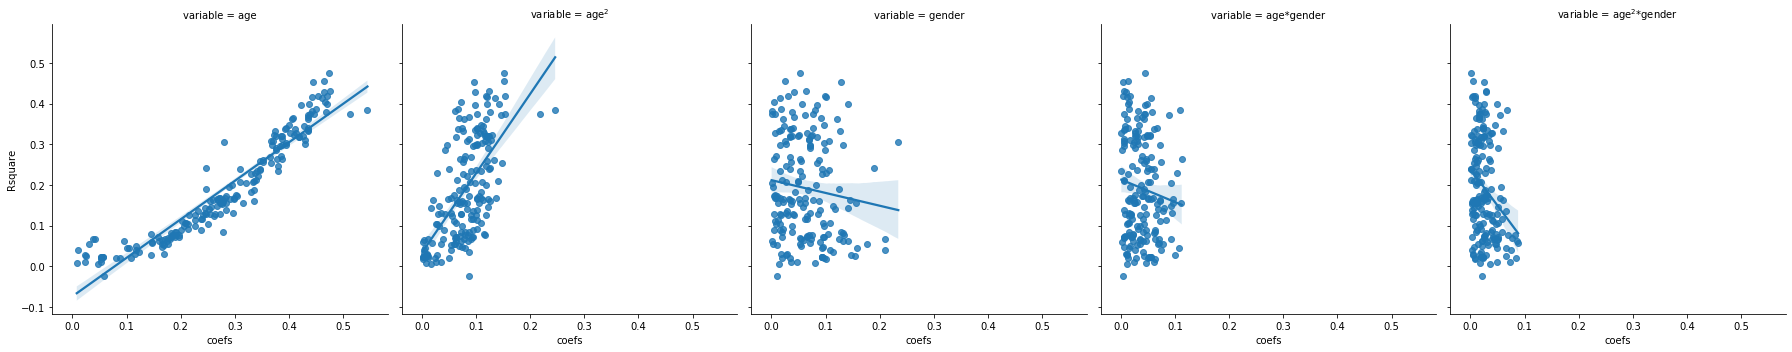

In [20]:
# plot coefs VS Rsquared:
import seaborn as sns
feature_beta_df.reset_index(inplace = True)
feature_p_df.reset_index(inplace = True)

plot_data1 = pd.melt(feature_beta_df.loc[feature_beta_df["modality"]!='behav',:],
                     id_vars = ['index', 'Rsquare', 'RsquareMedian'], 
                     value_vars = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender'],
                     value_name = 'coefs')
plot_data2 = pd.melt(feature_p_df.loc[feature_p_df["modality"]!='behav',:], 
                     id_vars = 'index', 
                     value_vars = ['age', 'age$^2$', 'gender', 'age*gender', 'age$^2$*gender'],
                     value_name = 'p value')


plot_data1.iloc[:,4] = abs(plot_data1.iloc[:,4].astype(float))
plot_data1.iloc[:,1] = plot_data1.iloc[:,1].astype(float)
plot_data1.iloc[:,2] = plot_data1.iloc[:,2].astype(float)
plot_data2.iloc[:,2] = plot_data2.iloc[:,2].astype(float)


plot_data = plot_data1.merge(plot_data2, on = ['index','variable'])
sns.lmplot(x = 'coefs', y = 'Rsquare', data = plot_data, 
           col = 'variable', order = 1,
          )

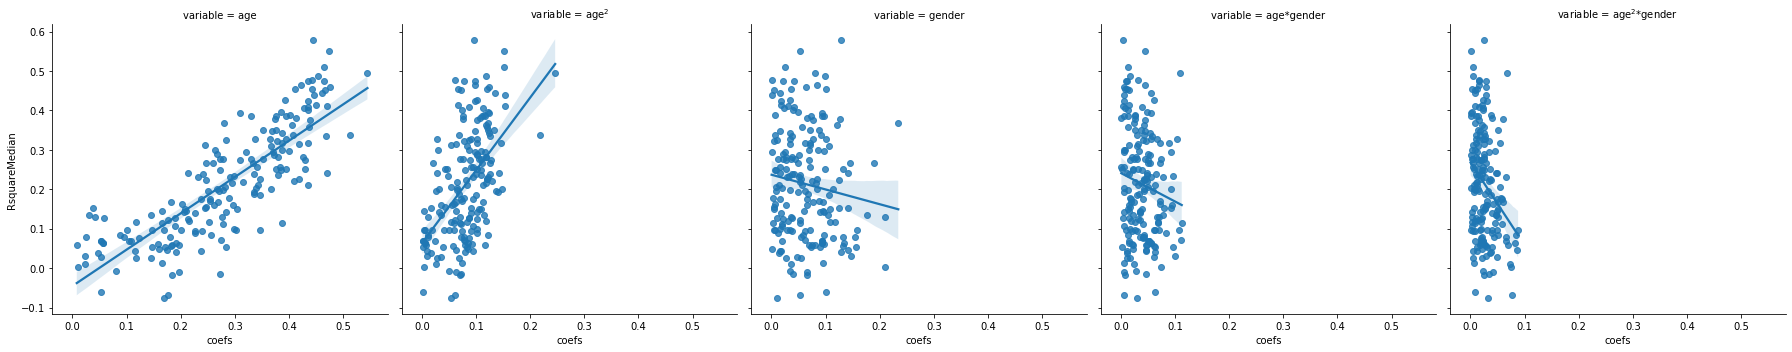

In [21]:
sns.lmplot(x = 'coefs', y = 'RsquareMedian', data = plot_data, 
           col = 'variable', order = 1,
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


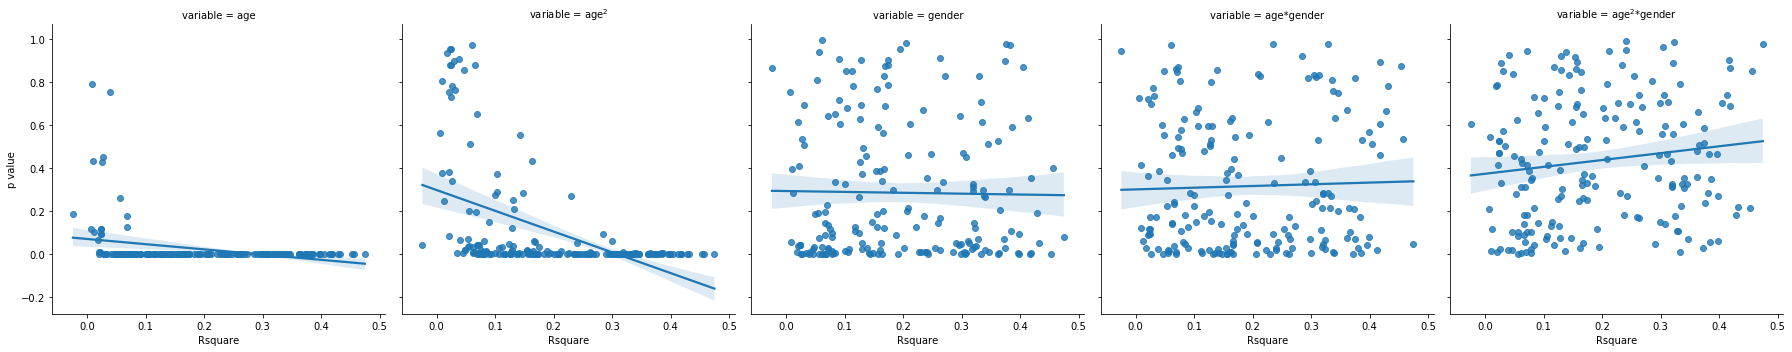

In [22]:
sns.lmplot(x = 'Rsquare', y = 'p value', data = plot_data, 
           col = 'variable', order = 1, sharex = False, size = 5
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


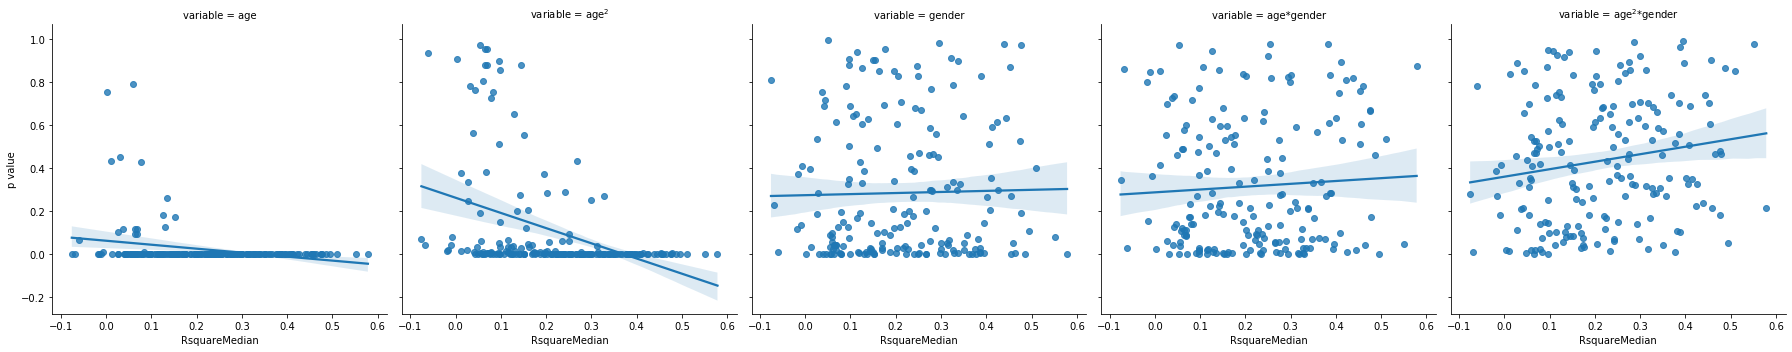

In [23]:
sns.lmplot(x = 'RsquareMedian', y = 'p value', data = plot_data, 
           col = 'variable', order = 1, sharex = False, size = 5
          )

C:\Users\Xin\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


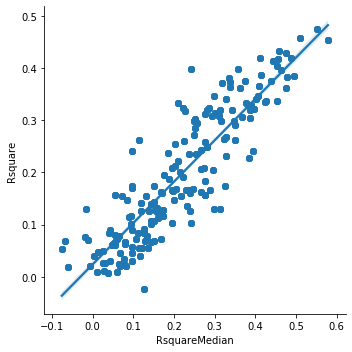

In [24]:
sns.lmplot(x = 'RsquareMedian', y = 'Rsquare', data = plot_data1, order = 1, sharex = False, size = 5
          )